In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Height-Weight Data.csv')
df

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671


In [3]:
df.head(10)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [4]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [11]:
df[12:20]

,Height,Weight
12,64.766329,167.127461
13,69.283070,189.446181
14,69.243732,186.434168
15,67.645620,172.186930
16,72.418317,196.028506
17,63.974326,172.883470
18,69.640060,185.983958
19,67.936005,182.426648


In [5]:
df.Height.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [6]:
df['Weight'].head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [7]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [8]:
df.std()

Height     2.858583
Weight    19.903132
dtype: float64

In [9]:
df.Height.mean()

69.02441087268797

In [10]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [14]:
df.Height.std()

2.8585833281420983

In [15]:
df.shape

(3501, 2)

In [16]:
row, col=df.shape

In [17]:
row

3501

In [18]:
col

2

In [19]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [21]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height VS Weight')

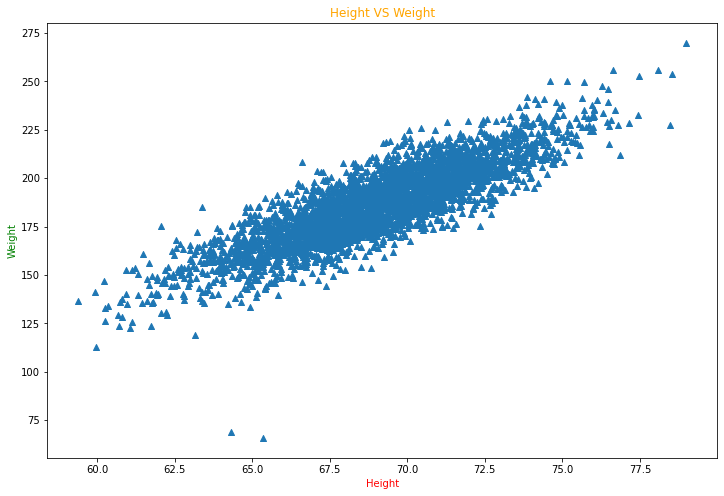

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(df.Height,df.Weight,marker='^')
plt.xlabel('Height',color='red')
plt.ylabel('Weight',color='green')
plt.title('Height VS Weight',color='orange')

In [72]:
x=df[['Height']]
y=df[['Weight']]
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [73]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


# Splite dataset into train & test

In [45]:
from sklearn.model_selection import train_test_split as tts

In [46]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)

In [48]:
xtrain.head()

,Height
1779,68.188097
1626,68.758993
429,67.757138
1696,75.682808
1447,64.437375


In [51]:
xtrain.shape

(2450, 1)

In [52]:
ytest.head()

,Weight
116,202.958306
964,222.397560
2018,227.940504
970,169.740272
1397,211.031652


In [53]:
ytest.shape

(1051, 1)

# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression()

In [56]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [58]:
m=reg.coef_
m

array([[5.95964755]])

In [61]:
c=reg.intercept_
c

array([-224.53906567])

In [62]:
x=73.84
y=m*x+c
y

array([[215.52130912]])

In [65]:
reg.predict([[45]])

array([[43.6450739]])

In [66]:
pred= reg.predict(xtest)
pred

array([[189.87822712],
       [215.21668114],
       [216.55236665],
       ...,
       [202.78172874],
       [167.03682912],
       [186.63217731]])

In [74]:
df['Predicted']=reg.predict(x)

In [75]:
df

,Height,Weight,Predicted
0,73.847017,241.893563,215.563128
1,68.781904,162.310473,185.376840
2,74.110105,212.740856,217.131042
3,71.730978,220.042470,202.952284
4,69.881796,206.349801,191.931808
...,...,...,...
3496,69.296830,185.649086,188.445617
3497,70.542201,210.198845,195.867592
3498,73.912549,202.429960,215.953676
3499,67.396021,144.277671,177.117464


In [77]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [82]:
mse=mean_squared_error(ytest,pred)

In [83]:
mse

108.20561573278195

In [85]:
mae=mean_absolute_error(ytest,pred)
mae

8.074328721281772

# Best fit line

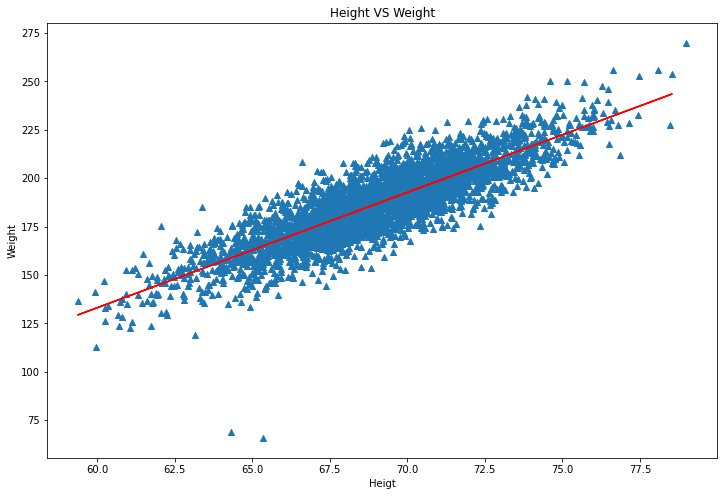

In [88]:
plt.figure(figsize=(12,8))
plt.scatter(x,y,marker='^')
plt.xlabel("Heigt")
plt.ylabel("Weight")
plt.title("Height VS Weight")
plt.plot(xtrain,reg.predict(xtrain),color='red')

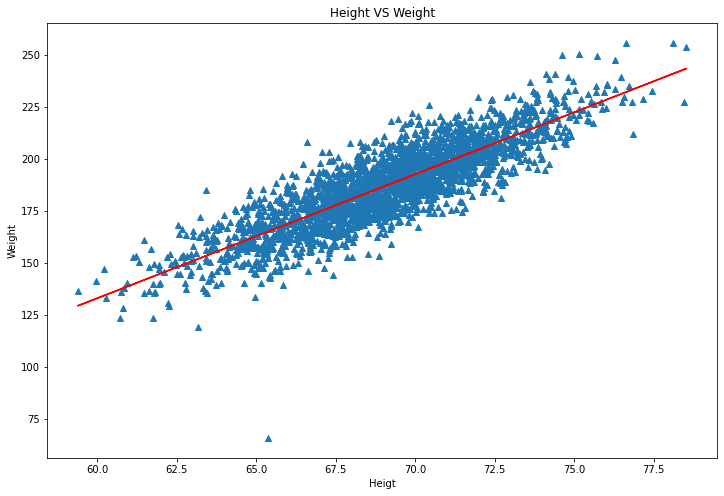

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(xtrain,ytrain,marker='^')
plt.xlabel("Heigt")
plt.ylabel("Weight")
plt.title("Height VS Weight")
plt.plot(xtrain,reg.predict(xtrain),color='red')

In [90]:
reg.score(xtest,ytest)

0.7336469436141666

In [91]:
from sklearn.metrics import r2_score

In [92]:
r2_score(ytest,pred)

0.7336469436141666